# NYPD Shooting Incident Project

<div>
<img src="images/NYPD.jpg" width="800"/>
</div>

## Table of Contents

1. Wrangling data  
   1.1 Fix columns  
   1.2 Missing values  
   1.3 Outliers  
   1.4 Transformations

2. Understand the data
3. Correlations

## Conclusions
- The connection between day and night attacks
- Incident's locations
- Inside or Outside?


#### Information on the data
We'll work with a dataset taken from [kaggle](https://www.kaggle.com/datasets/debjeetdas/nypd-shooting-incident-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install folium

In [2]:
Nypd_df = pd.read_csv("data.csv")
Nypd_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
0,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0,STREET,(null),Y,...,1020669,255027,40.866590,-73.868328,POINT (-73.86832754 40.86658962),5.0,22.0,32.0,11605.0,59.0
1,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0,STREET,(null),N,...,1008387,253290,40.861864,-73.912739,POINT (-73.91273918 40.86186421),5.0,29.0,34.0,11606.0,24.0
2,250216145,08/27/2022,00:21:00,BRONX,OUTSIDE,44,0,VEHICLE,(null),N,...,1008878,244480,40.837683,-73.910994,POINT (-73.910994 40.837683),5.0,42.0,27.0,10935.0,50.0
3,239207164,01/15/2022,19:50:00,QUEENS,OUTSIDE,113,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,1044794,188802,40.684689,-73.781699,POINT (-73.781699 40.684689),3.0,46.0,71.0,24669.0,41.0
4,248013313,07/14/2022,01:19:00,BROOKLYN,INSIDE,77,0,DWELLING,MULTI DWELL - APT BUILD,N,...,1002013,185752,40.676508,-73.935960,POINT (-73.93596 40.676508),2.0,49.0,49.0,17615.0,16.0


In [3]:
Nypd_df.shape

(1716, 26)

### 1. Wrangling data

#### 1.1 Fix columns

In [4]:
Nypd_df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes', 'Community Districts'],
      dtype='object')

Drop irrelevant columns

In [5]:
Nypd_df.drop(columns = ["X_COORD_CD", "Y_COORD_CD","New Georeferenced Column", "LOCATION_DESC"], inplace = True)

Change the names of the columns to more understandable names

In [6]:
Nypd_df.columns = ['Incident_Key', 'Inc_Date', 'Inc_Time', 'Borough', 'Loc_Of_Inc_Desc', 'Precinct', 'Jurisdiction_Code',
                   'Loc_Class_Desc', 'Murderd_In_The_Inc?', 'Att_Age_Group', 'Att_Sex', 'Att_Race', 'Vic_Age_Group', 'Vic_Sex',
                   'Vic_Race', 'Latitude', 'Longitude', 'Borough_Boundaries', 'City_Council_Districts', 'Police_Precincts', 'Zip_Codes',
                   'Community_Districts']

Let's look at the types of data

In [7]:
Nypd_df.dtypes

Incident_Key                int64
Inc_Date                   object
Inc_Time                   object
Borough                    object
Loc_Of_Inc_Desc            object
Precinct                    int64
Jurisdiction_Code           int64
Loc_Class_Desc             object
Murderd_In_The_Inc?        object
Att_Age_Group              object
Att_Sex                    object
Att_Race                   object
Vic_Age_Group              object
Vic_Sex                    object
Vic_Race                   object
Latitude                  float64
Longitude                 float64
Borough_Boundaries        float64
City_Council_Districts    float64
Police_Precincts          float64
Zip_Codes                 float64
Community_Districts       float64
dtype: object

#### 1.2 Missing values

In [8]:
Nypd_df.isnull().sum().sort_values(ascending = False)

Zip_Codes                 14
Community_Districts       10
Police_Precincts          10
City_Council_Districts    10
Borough_Boundaries        10
Longitude                 10
Latitude                  10
Inc_Date                   0
Vic_Race                   0
Vic_Sex                    0
Vic_Age_Group              0
Incident_Key               0
Att_Sex                    0
Att_Age_Group              0
Murderd_In_The_Inc?        0
Loc_Class_Desc             0
Jurisdiction_Code          0
Precinct                   0
Loc_Of_Inc_Desc            0
Borough                    0
Inc_Time                   0
Att_Race                   0
dtype: int64

When we checking the missing values, it does not appear that there are any missing values in the age, race, and sex columns of the attackers, but when we over on the data, we saw that these columns were filled with (null).
We found that these lines have no added value to our work, so we removed them.

In [9]:
Nypd_df = Nypd_df[Nypd_df['Att_Age_Group'].str.contains(r"\(null\)") == False]

In [10]:
Nypd_df = Nypd_df[Nypd_df['Att_Sex'].str.contains(r"\(null\)") == False]

In [11]:
Nypd_df = Nypd_df[Nypd_df['Att_Race'].str.contains(r"\(null\)") == False]

#### 1.3 Noisy data - outliers

We want to skim through the data and see if it looks ok. 

Let's see if we have outliers in the ages of the attackers and the victims

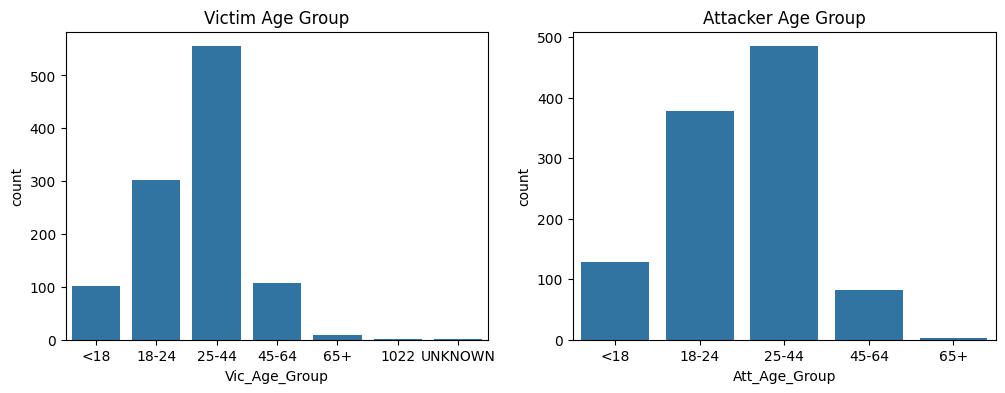

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

my_order = ['<18', '18-24', '25-44', '45-64', '65+', '1022', 'UNKNOWN']
my_order2 = ['<18', '18-24', '25-44', '45-64', '65+']

sns.countplot(data = Nypd_df, x = 'Vic_Age_Group', order = my_order, ax = ax[0])
ax[0].set_title("Victim Age Group")

sns.countplot(data = Nypd_df, x = 'Att_Age_Group', order = my_order2, ax = ax[1])
ax[1].set_title("Attacker Age Group")

plt.show()

Check the amount of women compared to men in the data

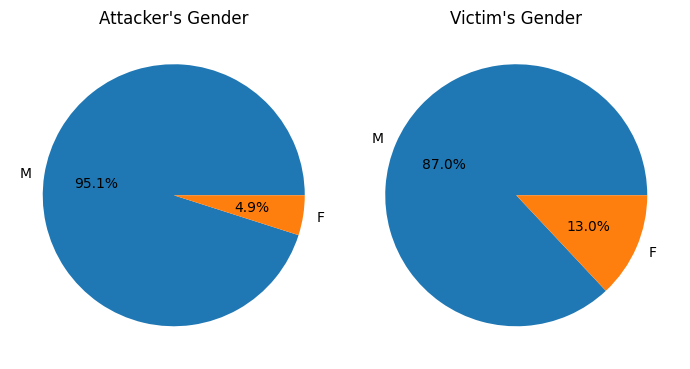

In [13]:
plt.figure(figsize = (7,5))

plt.subplot(1, 2, 1)
plt.title("Attacker's Gender")
Nypd_df['Att_Sex'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.ylabel("")

plt.subplot(1, 2, 2)
plt.title("Victim's Gender")
Nypd_df['Vic_Sex'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.ylabel("")

plt.tight_layout()
plt.show()

Check the racial percentages of the attackers and victims

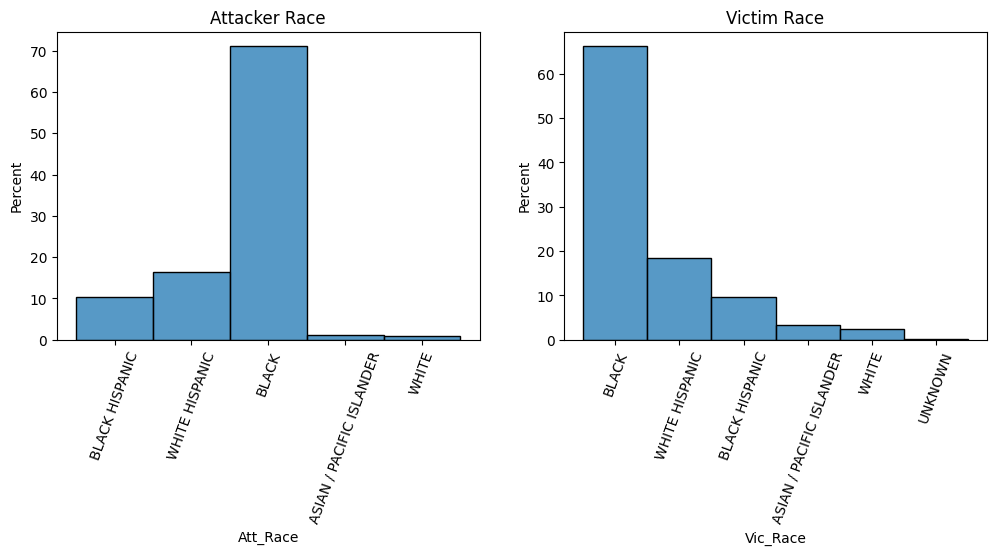

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(data = Nypd_df, x = 'Att_Race', ax = ax[0], stat = 'percent')
ax[0].set_title("Attacker Race")
ax[0].tick_params(axis = 'x', rotation = 70)

sns.histplot(data = Nypd_df, x = 'Vic_Race', ax = ax[1], stat = 'percent')
ax[1].set_title("Victim Race")
ax[1].tick_params(axis = 'x', rotation = 70)

plt.show()

#### Treat the outliers
We found outliers in the ages of the victims and decided to remove them

In [15]:
Nypd_df = Nypd_df[~Nypd_df['Vic_Age_Group'].isin(['1022', 'UNKNOWN'])]

Since the percentage of women in both the attackers and the victims is minimal compared to the percentage of men, from now on we will work on the analysis of men only and remove the women from the data.

In [16]:
Nypd_df = Nypd_df[~Nypd_df['Att_Sex'].isin(['F'])]

In [17]:
Nypd_df = Nypd_df[~Nypd_df['Vic_Sex'].isin(['F'])]

#### 1.4 Transformations

Change the date and time columns to a date type

In [18]:
Nypd_df['Inc_Time'] = pd.to_datetime(Nypd_df['Inc_Time'])

In [19]:
Nypd_df['Inc_Date'] = pd.to_datetime(Nypd_df['Inc_Date'])

In [20]:
Nypd_df.dtypes

Incident_Key                       int64
Inc_Date                  datetime64[ns]
Inc_Time                  datetime64[ns]
Borough                           object
Loc_Of_Inc_Desc                   object
Precinct                           int64
Jurisdiction_Code                  int64
Loc_Class_Desc                    object
Murderd_In_The_Inc?               object
Att_Age_Group                     object
Att_Sex                           object
Att_Race                          object
Vic_Age_Group                     object
Vic_Sex                           object
Vic_Race                          object
Latitude                         float64
Longitude                        float64
Borough_Boundaries               float64
City_Council_Districts           float64
Police_Precincts                 float64
Zip_Codes                        float64
Community_Districts              float64
dtype: object

Add columns of hours and months of the incidents

In [21]:
Nypd_df['Hour'] = pd.DatetimeIndex(Nypd_df['Inc_Time']).hour

In [22]:
Nypd_df['Month'] = pd.DatetimeIndex(Nypd_df['Inc_Date']).month

Change all the races in the data to black and white

In [23]:
replacement_dict = {
    'BLACK HISPANIC': 'BLACK',
    'WHITE HISPANIC': 'WHITE',
    'ASIAN / PACIFIC ISLANDER': 'WHITE'
}

Nypd_df['Att_Race'] = Nypd_df['Att_Race'].replace(replacement_dict)
Nypd_df['Vic_Race'] = Nypd_df['Vic_Race'].replace(replacement_dict)

### 2. Understand the data

At first we wanted to see on the map of New York the areas where most incidents happen

In [24]:
import os
import folium
from folium import plugins

data_c = Nypd_df[['Latitude','Longitude']].dropna()

CENTER = [40.7, -73.9]
m = folium.Map(location=CENTER, tiles="OpenStreetMap", zoom_start=11)

# gradient שמבליט אדומים
GRADIENT = {0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}

plugins.HeatMap(
    data_c[['Latitude','Longitude']].values.tolist(),
    radius=18,        
    blur=12,           
    min_opacity=0.3,   
    gradient=GRADIENT
).add_to(m)

os.makedirs("docs", exist_ok=True)   
m.save("docs/heatmap.html")          

![Heatmap preview](images/heatmap_preview.png)

➡️ [Open interactive Heatmap](https://adirbella37.github.io/NYPD-Shooting-Incident-Project/heatmap.html)

Let's see the distribution incidents hours by attackers age group 

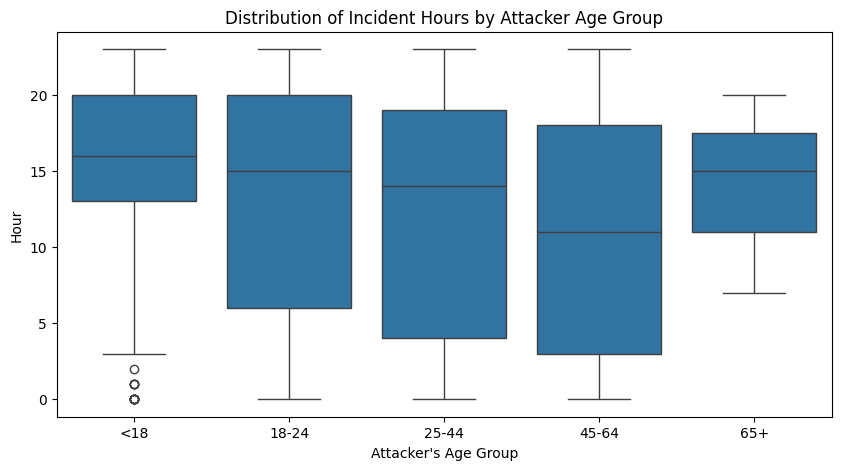

In [25]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = Nypd_df, x = 'Att_Age_Group', y = 'Hour', order = my_order2)
plt.xlabel("Attacker's Age Group")
plt.ylabel('Hour')
plt.title('Distribution of Incident Hours by Attacker Age Group')
plt.show()

Outside or Inside per hour

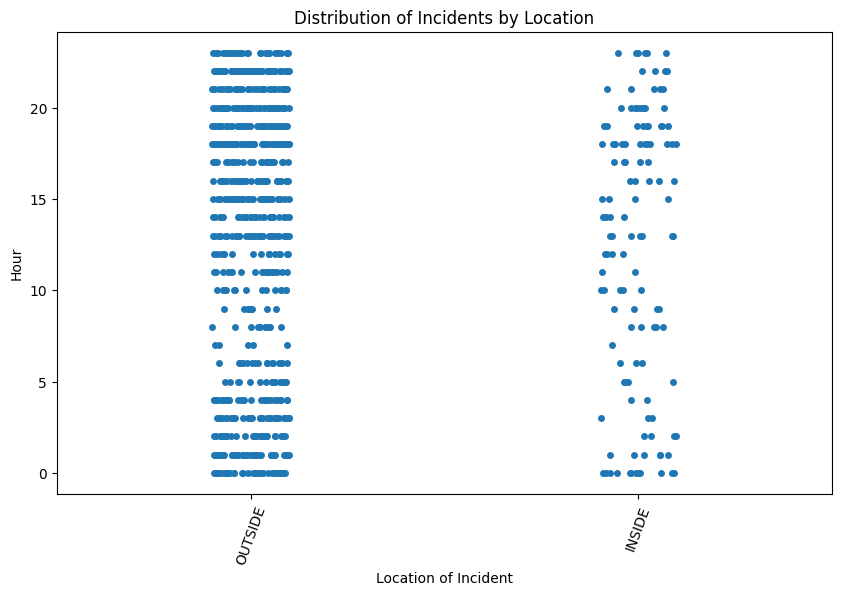

In [26]:
plt.figure(figsize = (10, 6))
sns.stripplot(data = Nypd_df, x = 'Loc_Of_Inc_Desc', y = 'Hour')
plt.xlabel('Location of Incident')
plt.ylabel('Hour')
plt.title('Distribution of Incidents by Location')
plt.xticks(rotation = 70)
plt.show()

### 3. Correlations - patterns in the data

To find patterns in the data, we need to find correlations in the data.

In [27]:
features = ['Borough', 'Loc_Of_Inc_Desc', 'Murderd_In_The_Inc?', 'Att_Age_Group', 'Att_Race','Vic_Age_Group', 'Vic_Race']
Nypd_Num_df = pd.get_dummies(Nypd_df[features])

In [28]:
correlation_matrix = Nypd_Num_df[:].corr().round(2)

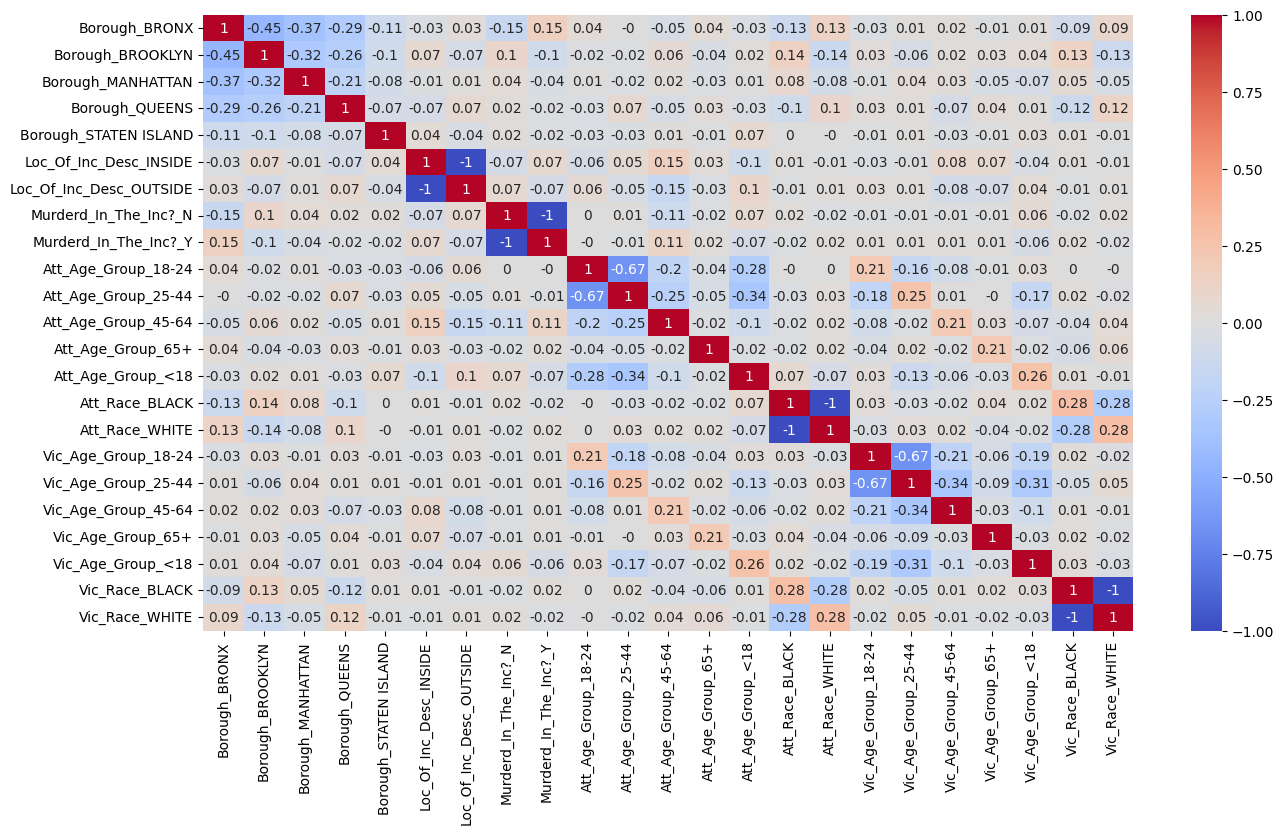

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(data = correlation_matrix, cmap = "coolwarm", annot = True)
plt.show()

We didn't found some correlations :

#### The connection between day and night attacks

<div>
<img src = "images/Day and Night.jpg" width="500"/>
</div>

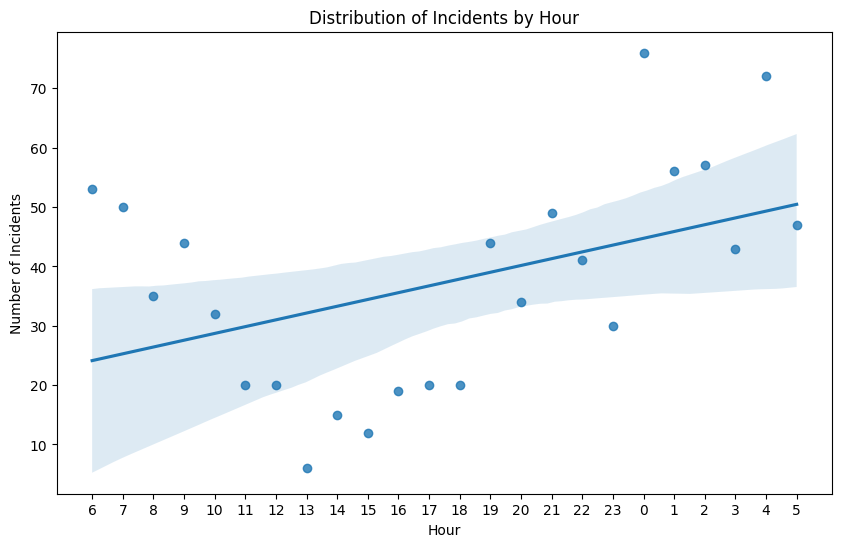

In [30]:
hour_counts = Nypd_df['Hour'].value_counts().sort_index()
hour_labels = list(range(6, 24)) + list(range(0, 6))
plt.figure(figsize=(10, 6))
sns.regplot(x = hour_counts.index, y = hour_counts.values, fit_reg = True)
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incidents by Hour')
plt.xticks(hour_counts.index, hour_labels)
plt.show()

#### The times of the shooting incidents
We wanted to check when most incidents occur (day or night)

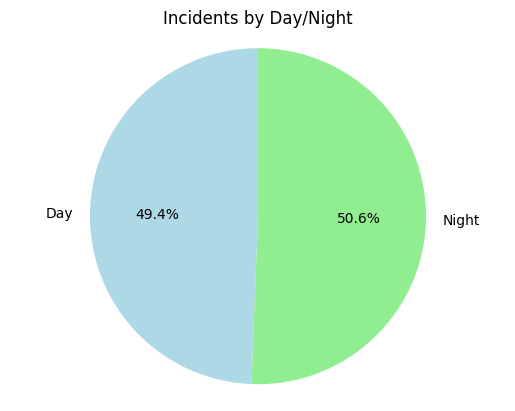

In [31]:
Nypd_df['Day_Night'] = Nypd_df['Inc_Time'].apply(lambda x: 'Day' if x.hour >= 6 and x.hour < 20 else 'Night')

hour_counts = Nypd_df.groupby('Day_Night').size()

labels = hour_counts.index
sizes = hour_counts.values
colors = ['lightblue', 'lightgreen']

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = colors)
plt.axis('equal')
plt.title('Incidents by Day/Night')
plt.show()

##### Conclusion 1:
We expected to find that the most shooting incidents occur at night, we were surprised to find that the percentage of incidents is almost 50-50.

#### Incident's locations

Let's see in which boroughs most of the incidents happened

C:\Users\Adir\AppData\Local\Temp\ipykernel_17380\1804725050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = Nypd_df, x = 'Borough', palette = colors)


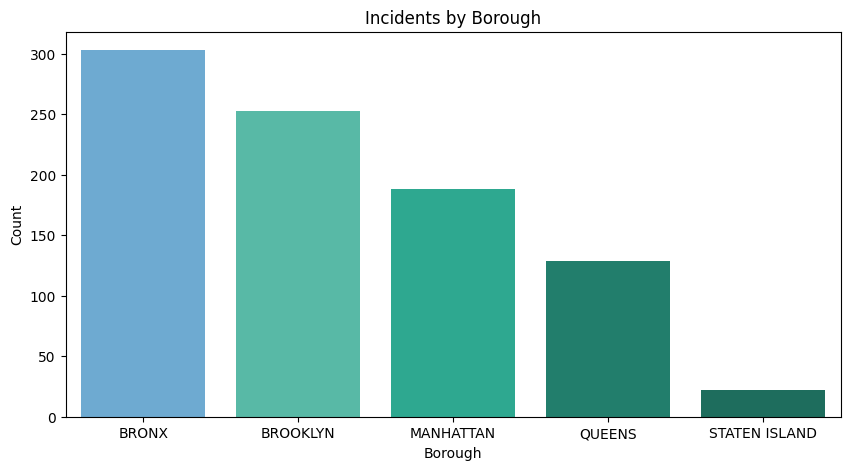

In [32]:
colors = ['#5DADE2', '#48C9B0', '#1ABC9C', '#138D75', '#117A65']

plt.figure(figsize = (10, 5))
sns.countplot(data = Nypd_df, x = 'Borough', palette = colors) 
plt.title('Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

Let's take the two problematic areas and see the distribution of incidents in them according to the months of the year


In [33]:
most_inc = Nypd_df.loc[(Nypd_df.Borough == 'BRONX') | (Nypd_df.Borough == 'BROOKLYN')]

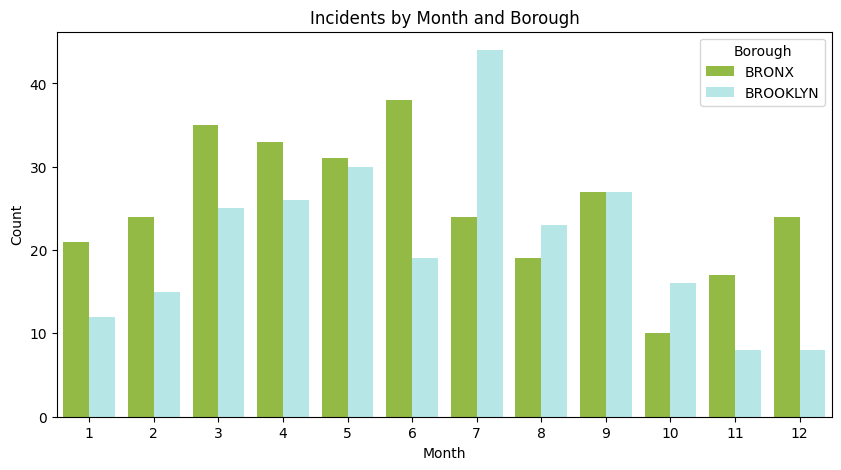

In [34]:
color_palette = ["#9ACD32", "#AFEEEE"]

plt.figure(figsize = (10, 5))
sns.countplot(data = most_inc, x = 'Month', hue = 'Borough', palette = color_palette)
plt.title('Incidents by Month and Borough')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title = 'Borough')
plt.show()

We saw that there is a linear change in Brooklyn and we decided to examine it more deeply

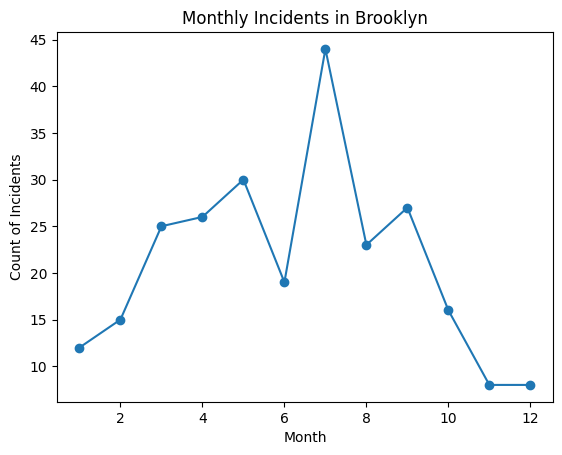

In [35]:
brooklyn_df = Nypd_df[Nypd_df['Borough'] == 'BROOKLYN']

monthly_counts = brooklyn_df.groupby('Month').size()

plt.plot(monthly_counts.index, monthly_counts.values, marker = 'o')
plt.xlabel('Month')
plt.ylabel('Count of Incidents')
plt.title('Monthly Incidents in Brooklyn')
plt.show()

##### Conclusion 2:
From this graph it can be seen that at the beginning of the year there is an increase in the trend of incidents and reaching a peak in the seventh month and from there a decrease in the number of incidents.
We speculate that the downward trend is due to police intervention in Brooklyn which after months with a significant increase in crime, decided to reduce incidents there to an almost zero level at the end of the year.

###### <div>
<img src = "images/Brooklyn99.jpg" width="600"/>
</div>

#### Inside or Outside?

We were interested in checking among the adults where most of the incidents happen (inside or outside?)

In [36]:
adults = Nypd_df.loc[(Nypd_df.Att_Age_Group == '45-64') | (Nypd_df.Att_Age_Group == '65+')]

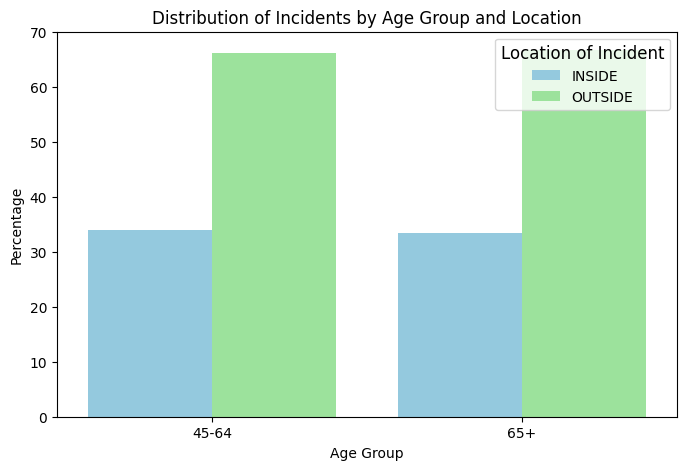

In [37]:
percentages = adults.groupby(['Att_Age_Group', 'Loc_Of_Inc_Desc']).size() / adults.groupby('Att_Age_Group').size() * 100
percentages = percentages.reset_index(name = 'Percentage')

colors = ['#87CEEB', '#90EE90']
plt.figure(figsize = (8, 5))
sns.barplot(data = percentages, x = 'Att_Age_Group', y = 'Percentage', hue = 'Loc_Of_Inc_Desc', palette = colors)
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Distribution of Incidents by Age Group and Location')
plt.legend(title ='Location of Incident', title_fontsize = '12')
plt.show()

##### Conclusion 3:
We thought that in the older ages the percentages of attackings outside would decrease since the olders has more exercise of discretion and understanding that the chances of being caught is greater. We were surprised to find that the percentage of cases outside at these ages is around 70%.